[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/Udacity-CarND-Capstone/blob/master/Hello,_Colaboratory.ipynb)

In [4]:
import tensorflow as tf
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# !wget "https://github.com/jorcus/CarND-Capstone-Dataset/archive/master.zip"
# !unzip 'master.zip'
# !unzip 'CarND-Capstone-Dataset-master/dataset.zip'

# !wget "https://github.com/bosch-ros-pkg/bstld/blob/master/images/dataset_sample.jpg"
# !unzip 'dataset-sdcnd-capstone.zip'
# !mkdir non_traffic_light
!ls -ltr
# !rm TrafficLight_Detection-TensorFlowAPI.1



total 59496
-rw-r--r-- 1 root root    49394 May 18  2011 road.jpg.1
-rw-r--r-- 1 root root    49394 May 18  2011 road.jpg
-rw-r--r-- 1 root root   203788 Oct 28  2015 1200px-Road_diet_in_Davis_CA.jpg
-rw-r--r-- 1 root root     6379 Dec  1  2015 images?q=tbn:ANd9GcSlj3zO_fll0Agif-Q26R2I86gi41JwS2rFE2KlReDkyxQR3ymQ.1
-rw-r--r-- 1 root root     6379 Dec  1  2015 images?q=tbn:ANd9GcSlj3zO_fll0Agif-Q26R2I86gi41JwS2rFE2KlReDkyxQR3ymQ
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg.3
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg.2
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg.1
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg
-rw-r--r-- 1 root root   391213 Jul 14  2017 37596686-road-images.jpg
drwxr-xr-x 2 root root     4096 Oct  1  2017 CarND-Capstone-Dataset-master
drwxr-xr-x 5 root root     4096 Oct  1  2017 simulator
drwxr-xr-x 6 root root     4096 Oct  1  2017 udacity-sdc
drwxr-xr-x 1 root root     4096 May 21 17:02 

In [3]:
# v= glob.glob('non_traffic_light')
# print(len(v))

1


In [6]:
folders=['green', 'red', 'yellow']
x_images=[]
y_labels=[]


for i in range (len(folders)):
  path= glob.glob('udacity-sdc/'+folders[i]+'/*jpg')
  for image_path in path:
#     eval(folders[i]+'.append(cv2.imread(image_path))')
    if(i==0):
      num=1
    else:
      num=2
    for j in range(num):
      eval('x_images.append(np.copy(cv2.imread(image_path)))')
      y_labels.append(i)
      
for i in range (len(folders)):
  path= glob.glob('simulator/'+folders[i]+'/*jpg')
  for image_path in path:
#     eval(folders[i]+'.append(cv2.imread(image_path))')
    if(i==0):
      num=4
    elif i==2:
      num=8
    else:
      num=1
    for j in range(num):
      eval('x_images.append(np.copy(cv2.imread(image_path)))')
      y_labels.append(i)


In [22]:
!ls -lrt

total 59496
-rw-r--r-- 1 root root    49394 May 18  2011 road.jpg.1
-rw-r--r-- 1 root root    49394 May 18  2011 road.jpg
-rw-r--r-- 1 root root   203788 Oct 28  2015 1200px-Road_diet_in_Davis_CA.jpg
-rw-r--r-- 1 root root     6379 Dec  1  2015 images?q=tbn:ANd9GcSlj3zO_fll0Agif-Q26R2I86gi41JwS2rFE2KlReDkyxQR3ymQ.1
-rw-r--r-- 1 root root     6379 Dec  1  2015 images?q=tbn:ANd9GcSlj3zO_fll0Agif-Q26R2I86gi41JwS2rFE2KlReDkyxQR3ymQ
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg.3
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg.2
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg.1
-rw-r--r-- 1 root root   213442 Jun  6  2017 335625f11236d1c.jpg
-rw-r--r-- 1 root root   391213 Jul 14  2017 37596686-road-images.jpg
drwxr-xr-x 2 root root     4096 Oct  1  2017 CarND-Capstone-Dataset-master
drwxr-xr-x 5 root root     4096 Oct  1  2017 simulator
drwxr-xr-x 6 root root     4096 Oct  1  2017 udacity-sdc
drwxr-xr-x 1 root root     4096 May 21 17:02 

In [7]:
# !wget ""
# # !ls -lrt
names=["335625f11236d1c","1200px-Road_diet_in_Davis_CA","37596686-road-images","dataset_sample"]
image_sample= cv2.imread(image_name+".jpg")
# print(image_sample)
offsetx=10
offsety=10
for image_name in names:
  for i in range(20):
    k=10*i
    subimage= image_sample[k+offsetx:k+256+offsetx, k+offsety:k+85+offsety,:]
  #   plt.show('sd',subimage)
    cv2.imwrite('non_traffic_light/'+image_name+str(i+k+offsetx*offsety)+'.jpg', subimage)


  # plt.figure(figsize=(12,12))
  paths= glob.glob('non_traffic_light/*.jpg')
  train_traffic_light_labels=[]
  # print(len(paths))
  train_traffic_light_images=[]
  for i in range(len(paths)):
    try:
      image=cv2.imread(paths[i])
  #     print(image)
  #     print(image.shape)
      if(image.shape==(256, 85, 3)):
  #       plt.subplot(10, 6, i+1)
  #       plt.axis('off')
  #       plt.tight_layout()
  #   #     plt.title(y_labels[i])
  #       plt.imshow(image)

        for k in range(15):
          train_traffic_light_images.append(image)
          train_traffic_light_labels.append(0)
    except:
      pass
#     print(images[i])
# plt.show()
print(len(train_traffic_light_images))

for i in train_traffic_light_images:
  x_images.append(i)
  y_labels.append(3)
# print(len(train_traffic_light_images))




x_images= np.array(x_images)
y_labels= np.array(y_labels)

print(len(x_images), len(y_labels),x_images.shape) 


class_count= np.unique(y_labels, return_counts =True)
print(class_count)

645
2377 2377 (2377, 256, 85, 3)
(array([0, 1, 2, 3]), array([550, 638, 544, 645]))


In [0]:

# def  normalize (x_images):
# #     return (x_images-127.5)/127.5
#   return x_images/255

# # print(type(x_images[0]))
# x_images=  normalize(x_images)

In [0]:
# sorted_images=[green, red, yellow]
# features_green=[]
# features_red=[]
# features_yellow=[]

# features=[features_green,features_red,features_yellow]

# for j in range(len(sorted_images)):
#   type_of_image=sorted_images[j]
#   for i in range(len(type_of_image)):
#     image= np.copy(type_of_image[i])
# #     print(image.shape)
#     features[j].append(np.mean(image))
#   print(features[j])  
    

In [8]:

#HYPER parameters tuning
EPOCHS = 15
BATCH_SIZE = 128
prob=0.5
rate = 0.001
mu = 0
sigma = 0.1
num_of_classes=4
# ((i-k+2p)/s) +1
 

In [15]:
#(256, 85, 3)
k_size=(7,4)
def layers(X,keep_prob):
  layer1= tf.layers.conv2d(X,filters=6, kernel_size =k_size, strides=(1,1), padding='valid', activation=tf.nn.relu)
  #Output shape: 248X82X6
  layer1= tf.layers.dropout(layer1,keep_prob)
  layer1= tf.layers.max_pooling2d(layer1, pool_size=(2,2), strides=(2,2), padding='valid')
  #Output shape: 124X41X6
  

  layer2= tf.layers.conv2d(layer1,filters=16, kernel_size =k_size, strides=(1,1), padding='valid', activation=tf.nn.relu)
  #Output shape: 116X38X16
  layer2= tf.layers.dropout(layer2,keep_prob)
  layer2= tf.layers.max_pooling2d(layer2, pool_size=(2,2), strides=(2,2), padding='valid')
  #Output shape: 68X19X16  

  layer3= tf.layers.conv2d(layer2, filters=32, kernel_size =k_size, strides=(1,1), padding='valid', activation=tf.nn.relu)
  #Output shape: 60X16X32
  layer3= tf.layers.dropout(layer3,keep_prob)
  layer3= tf.layers.max_pooling2d(layer3, pool_size=(2,2), strides=(2,2), padding='valid')
  #Output shape: 30X8X32
  
  layer4= tf.layers.conv2d(layer3, filters=48, kernel_size =(5,3), strides=(1,1), padding='valid', activation=tf.nn.relu)
  #Output shape: 22X4X48
  
  layer5= tf.contrib.layers.flatten(layer4)
  #Output shape: 22X4X48= 3264
  
  W6= tf.Variable(tf.truncated_normal(shape=(6336  , 600), mean=mu, stddev=sigma))
  b6= tf.Variable(tf.zeros(600))
  layer6= tf.add(tf.matmul(layer5, W6),b6)
  layer6= tf.nn.elu(layer6)
  layer6= tf.layers.dropout(layer6, keep_prob)
  
  W7= tf.Variable(tf.truncated_normal(shape=(600, 3), mean=mu, stddev=sigma))
  b7= tf.Variable(tf.zeros(3))
  logits= tf.add(tf.matmul(layer6, W7),b7)
#   logits= tf.nn.relu(layer7)
  

  return logits
  

In [10]:
x= tf.placeholder(tf.float32,(None, 256, 85, 3), name='x')
y= tf.placeholder(tf.int32, (None), name='y')
keep_prob=tf.placeholder(tf.float32, name='prob')
one_hot= tf.one_hot(y,num_of_classes)

In [16]:
logits_x=layers(x, keep_prob)

cross_entropy= tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot, logits=logits_x)
loss_operation=tf.reduce_mean(cross_entropy)

correct_prediction = tf.equal(tf.argmax(logits_x, 1), tf.argmax(one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer= tf.train.AdamOptimizer(learning_rate=rate)
training_operation=optimizer.minimize(loss_operation)
saver= tf.train.Saver()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_images,y_labels= shuffle(x_images, y_labels)
X_train, X_test, y_train, y_test = train_test_split(x_images, y_labels, test_size=0.2)

train_loss=[]
test_loss=[]
test_accuracy=[]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(EPOCHS):
#     X_train,Y_train= shuffle(X_train, y_train)
    no_batches=len(X_train)//BATCH_SIZE
    accuracy_t=0
    loss_t=0
    print("Epoch {}".format(i+1))
    
    for j in range(no_batches):
      
      lower_bound= j*BATCH_SIZE
      upper_bound= lower_bound+BATCH_SIZE
      
      X_train,Y_train= shuffle(X_train, y_train)
      sess.run(training_operation, feed_dict={x:X_train[lower_bound:upper_bound], y:y_train[lower_bound:upper_bound], keep_prob:prob})

      loss_train+= sess.run(loss_operation, feed_dict={x:X_train[lower_bound:upper_bound], y:y_train[lower_bound:upper_bound], keep_prob:prob })
      
      a,l= sess.run([accuracy_operation, loss_operation], feed_dict={x:X_test, y:y_test, keep_prob:prob })
      accuracy_t+=a
      loss_t+=l
      
      print("test loss: {}, test accuracy: {}".format(l,a))
      
    train_loss.append(loss_train/no_batches)
    test_loss.append(loss_t/no_batches)
    test_accuracy.append(accuracy_t/no_batches)
    
    print("Epoch {}, tain loss: {}, test loss: {}, test accuracy: {}".format(i+1, loss_train/no_batches,  loss_t/no_batches, accuracy_t/no_batches))
    print('-------------------------')
    
  saver.save(sess, "./model")
  print("Model saved")

Epoch 1


ResourceExhaustedError: ignored

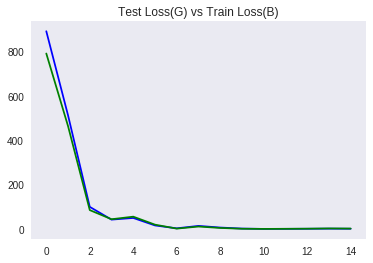

In [0]:



plt.plot(train_loss ,'b')
plt.plot(test_loss,'g')
plt.title("Test Loss(G) vs Train Loss(B)")
plt.grid()
plt.show()

INFO:tensorflow:Restoring parameters from ./model


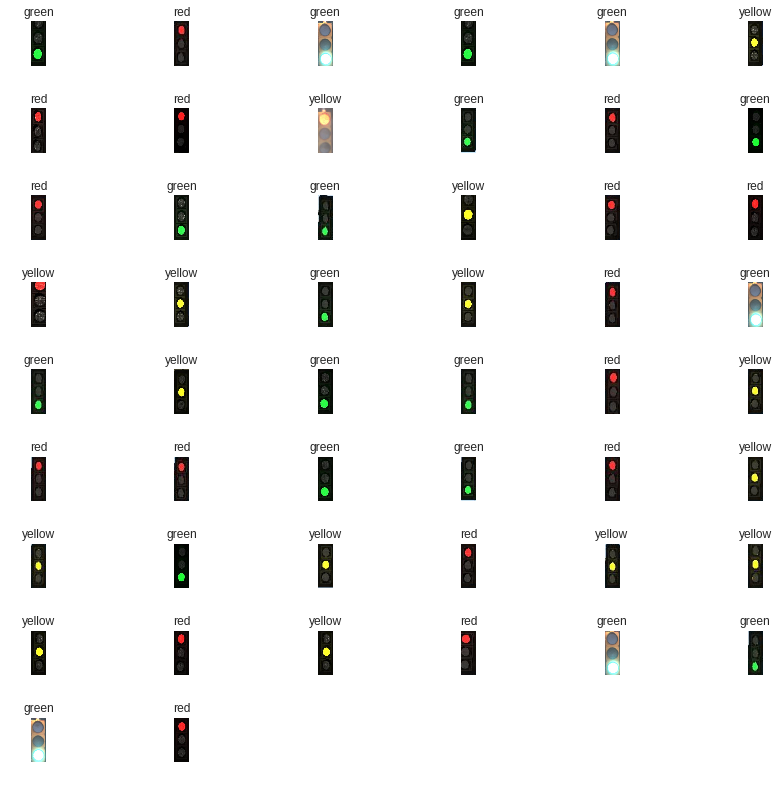

In [0]:
softmax_logits= tf.nn.softmax(logits_x)
X_test,y_test= shuffle(X_test, y_test)
# top_k= tf.nn.top_k(softmax_logits, 3)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  saver.restore(sess, './model')
  test_softmax_logits= sess.run(softmax_logits, feed_dict={x:X_test, keep_prob: 1})
#   test_top_k= sess.run(top_k, feed_dict={x:X_test, keep_prob: 1})

labels = []
images= []
for i in range(len(X_test)):
  images.append(X_test[i].squeeze())
  labels.append(folders[np.argmax(test_softmax_logits[i])])
  
plt.figure(figsize=(12,12))

for i in range(50):
    plt.subplot(10, 6, i+1)
    plt.axis('off')
    plt.tight_layout()
    plt.title(labels[i])
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
#     print(images[i])
plt.show()

In [0]:
# plt.figure(figsize=(12,12))

# for i in range(50):
#     plt.subplot(10, 6, i+1)
#     plt.axis('off')
#     plt.tight_layout()
#     plt.title(y_labels[i])
#     plt.imshow(x_images[i])
# #     print(images[i])
# plt.show()

--2018-06-07 06:30:29--  http://kb4images.com/images/road-images/37596686-road-images.jpg
Resolving kb4images.com (kb4images.com)... 107.181.161.149
Connecting to kb4images.com (kb4images.com)|107.181.161.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391213 (382K) [image/jpeg]
Saving to: ‘37596686-road-images.jpg.1’

37596686-road-image 100%[===================>] 382.04K  --.-KB/s    in 0.1s    

2018-06-07 06:30:29 (3.75 MB/s) - ‘37596686-road-images.jpg.1’ saved [391213/391213]



0


NameError: ignored

In [0]:
# !wget http://dyyjibobl04qk.cloudfront.net/blog/wp-content/uploads/2017/05/519790542.jpg

In [0]:
# print(test_softmax_logits)